In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
# Paths
data_dir = 'Pothole_Dataset'
img_size = (150, 150)
batch_size = 32

In [3]:
# Data Preprocessing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [4]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*img_size, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

C:\Users\AI\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.4825 - loss: 0.9334 - val_accuracy: 0.7556 - val_loss: 0.5443
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7496 - loss: 0.4844 - val_accuracy: 0.7185 - val_loss: 0.7463
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 912ms/step - accuracy: 0.8269 - loss: 0.4574 - val_accuracy: 0.8148 - val_loss: 0.3732
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 872ms/step - accuracy: 0.8962 - loss: 0.2740 - val_accuracy: 0.8074 - val_loss: 0.5247
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 839ms/step - accuracy: 0.9177 - loss: 0.2243 - val_accuracy: 0.8222 - val_loss: 0.3686
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 902ms/step - accuracy: 0.9182 - loss: 0.1864 - val_accuracy: 0.8296 - val_loss: 0.3284
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 906ms/step - accuracy: 0.9344 - loss: 0.2003 - val_accuracy: 0.8222 - val_loss: 0.3455
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 850ms/step - accuracy: 0.8921 - loss: 0.2757 - val_accuracy: 

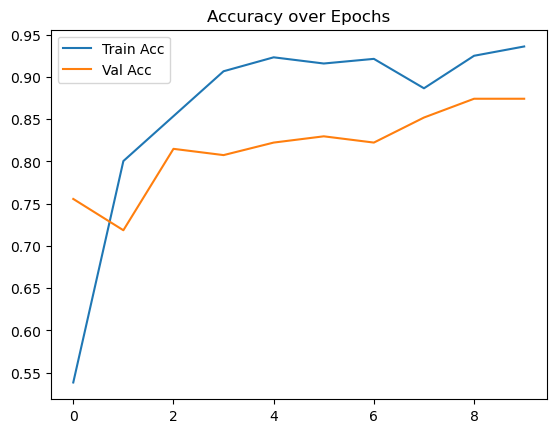

In [6]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

In [7]:
# Test Prediction
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    if prediction >= 0.5:
        print("Predicted: Pothole Detected")
    else:
        print("Predicted: No Pothole")

Example usage

In [8]:
predict_image('Pothole_Dataset/pothole/10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Predicted: Pothole Detected


In [9]:
predict_image('Pothole_Dataset/non_pothole/10.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted: No Pothole


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_and_show(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)
    
    # Prediction
    prediction = model.predict(img_array_expanded)[0][0]
    label = "Pothole Detected" if prediction >= 0.5 else "No Pothole"

    # Show image with result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


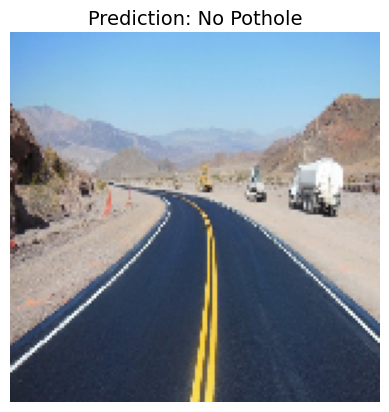

In [11]:
predict_and_show('Pothole_Dataset/non_pothole/4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


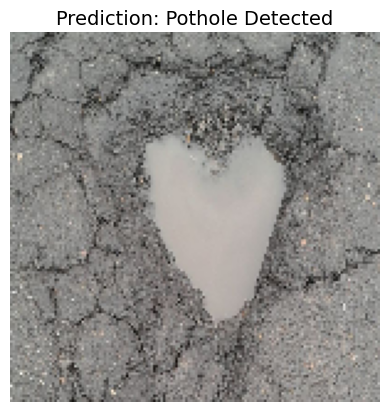

In [12]:
predict_and_show('Pothole_Dataset/pothole/16.jpg')